# Chapter 1: Regression

# You learn
* How to simulate a curve
* How a to fit a linear regression model 
* How to predict a quantitative variable
* How to to classification using linear regression
* How to predict the class for a new observation 





# Linear Regression
Linear regression the expected value of $y$ is assumed to be a linear combination of the input variables $x_j$. In mathematical notion, if $\hat{y}$ is the predicted value.
$\hat{y}(\boldsymbol \beta, \mathbf x) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p$
The vector $\boldsymbol \beta$ is the regression coefficients (or learning rates) and $\beta_0$ is the `intercept`.
Later we perform classification using this model. Logistic regression, linear discriminant, linear support vector machines are closely related concepts.


# Simulating a cuve
We need to start with a defining a curve and add some noise about this curve. Use the exponential function for instance $y=e^{3x}$.


In [1]:
x_tr <- seq(0, 2, length=200)
y_tr <- exp(3*x_tr)

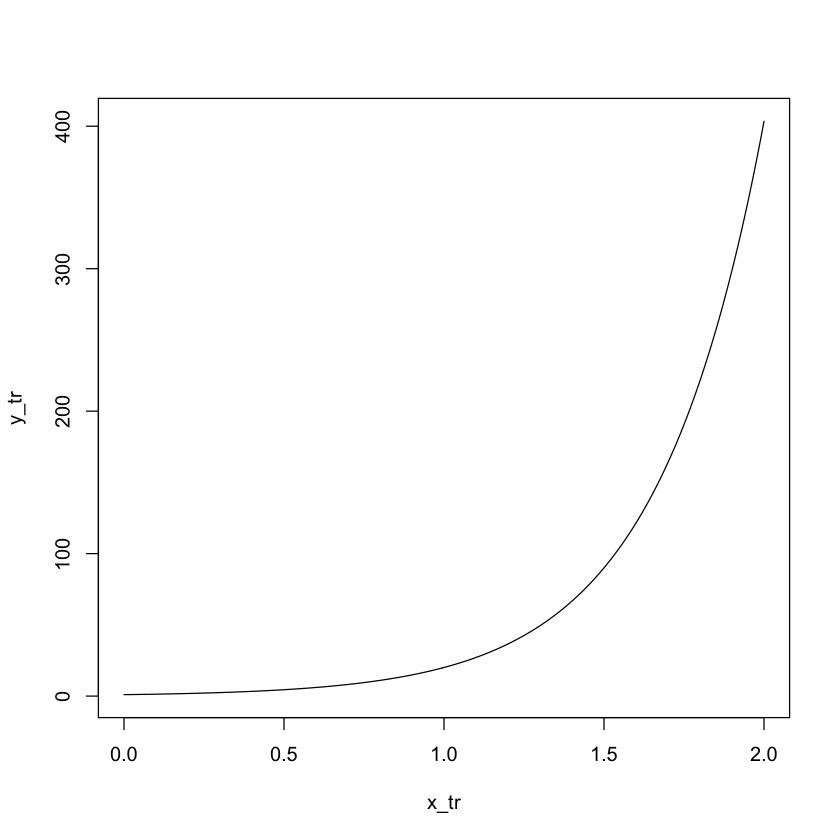

In [23]:
plot(x_tr, y_tr,type="l")

In [3]:
set.seed(10)
y <- y_tr+rnorm(length(x_tr), mean=0, sd=25)

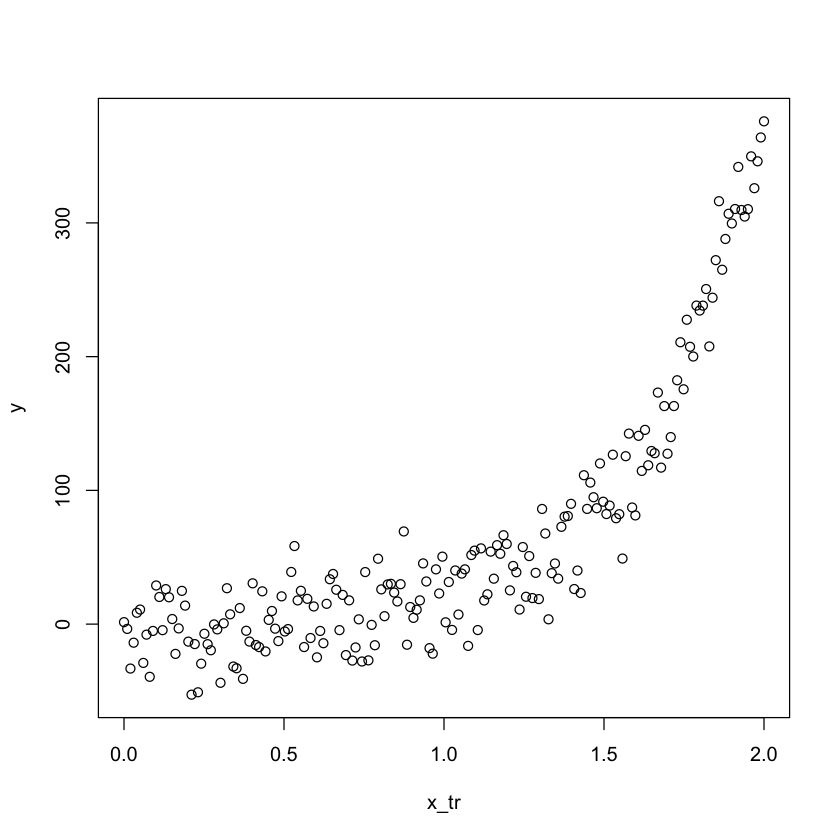

In [4]:
plot(x_tr,y)

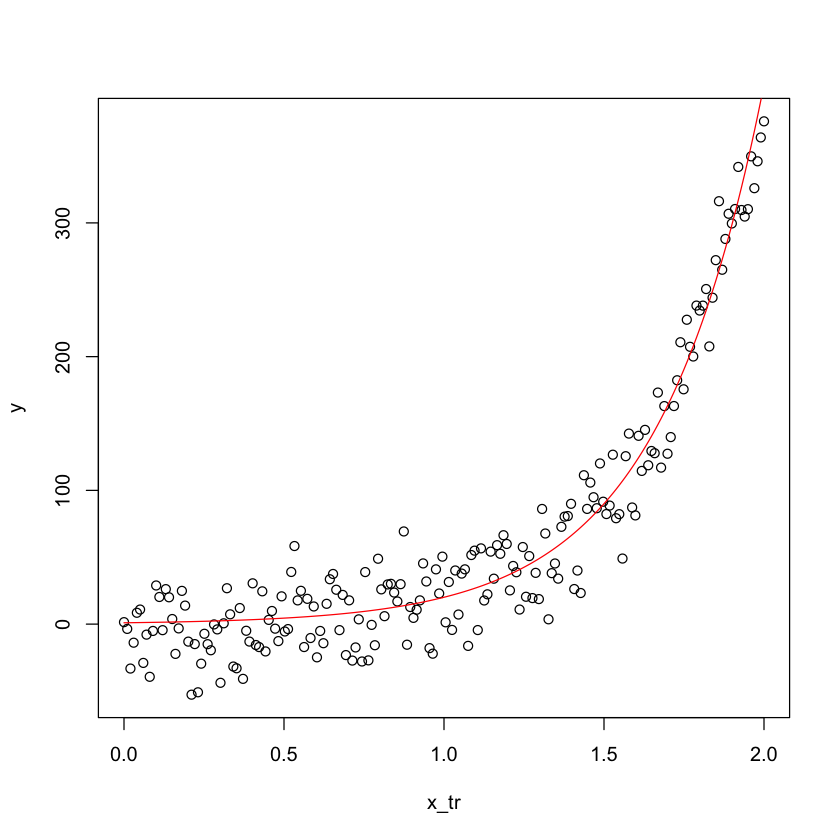

In [5]:
plot(x_tr,y)
points(x_tr, y_tr, type="l", col="red")

# Linear approximation
Now let's fit a line, this is a wrong model, but can be regarded as an approximation. Remember to fit the models while your  data are put in a single dataframe. 

In [32]:
regdata <- as.data.frame(cbind(y_tr, x_tr, x_tr^2))
colnames(regdata) <- c("y","x","z")
#regdata
#lr.fit <- lm(y~x, data=regdata)
class(lr.fit)
lr.fit <- lm(y~x+z, data=regdata)
yhat <- predict(lm(y~x+z, data=regdata))


[1] "lm"

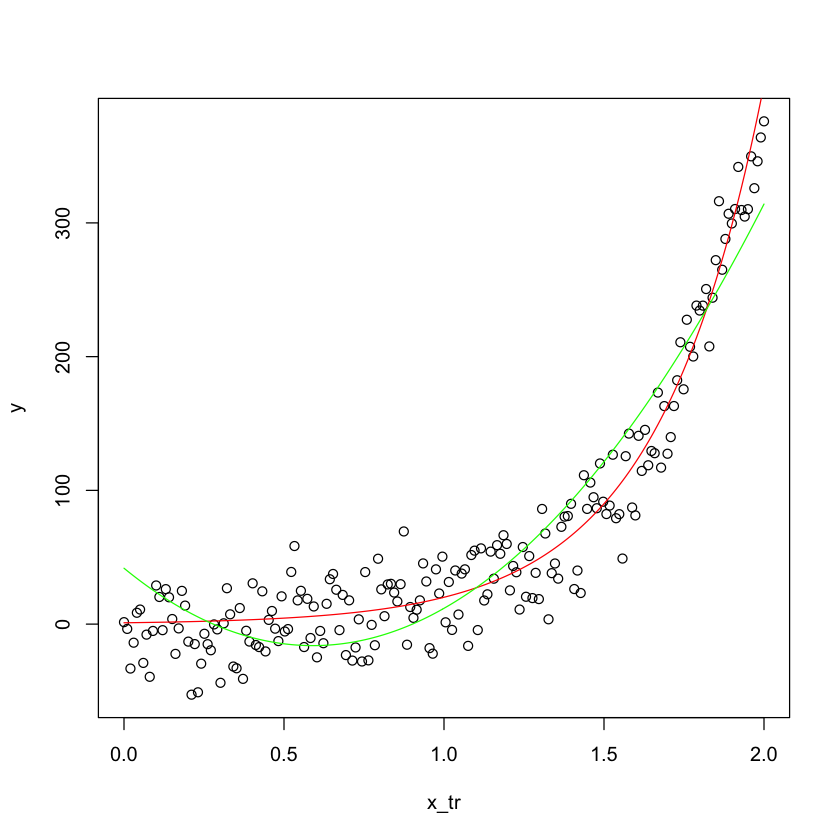

In [30]:
plot(x_tr,y)
points(x_tr, y_tr, type="l", col="red")
points(x_tr, yhat,type="l",col="green")

# Binary regression
Now lets make a binary response variable. In most supervised learning problems targets prediction of a categorical variable. You can look at binary data as a continuous data, but observed after threshold.

Lets threshold our continuous data "y" at point 90. In Machine learning classes are defined using -1 and 1. 






In [38]:
as.numeric(y>90)
z<-((y>90)-0.5)*2

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
[149] 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [39]:
z

[1] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 [26] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 [51] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 [76] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
[101] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
[126] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1
[151] -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[176]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

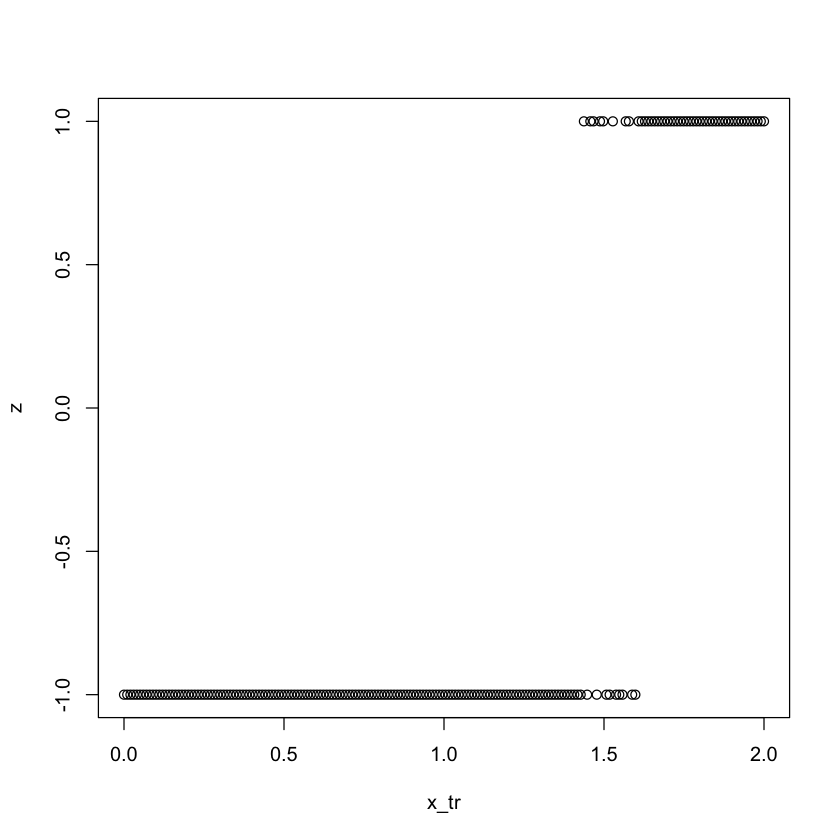

In [10]:
plot(x_tr, z)

# Exercise
Fit a linear regression on z as the response (and x_tr as the feature) and see how well you predict your data.

In [11]:
traindata <- as.data.frame(cbind(z, x_tr))
colnames(traindata) <- c("z", "x")
#traindata
zhat <- predict(lm(z~x, data=traindata))

In [12]:
zclass <- 2*(zhat>0)-1

In [41]:
mean(zclass==z)

[1] 0.95

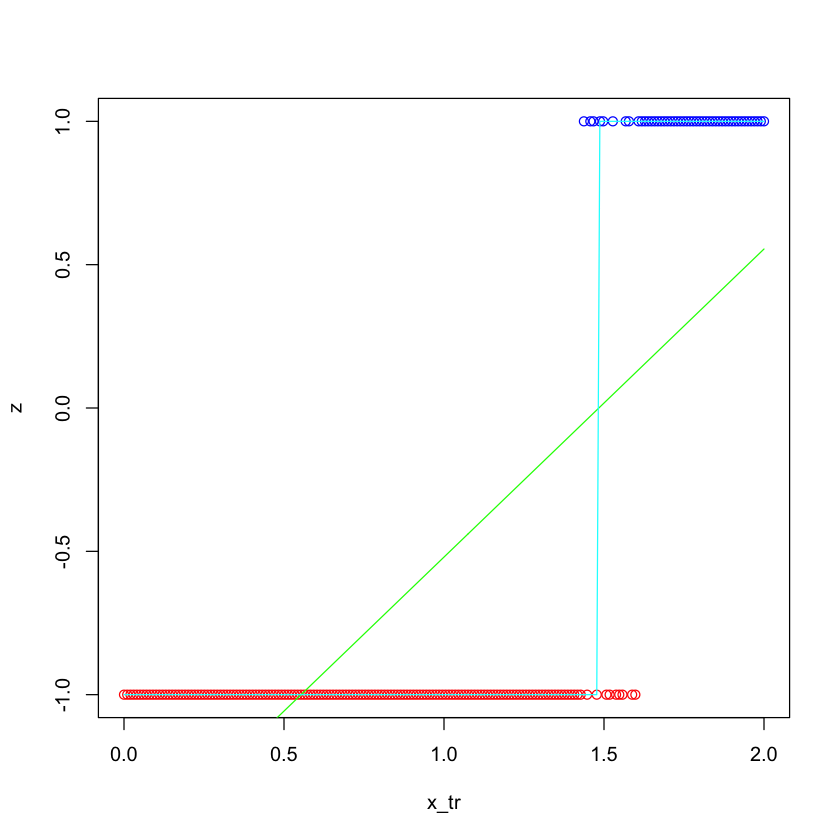

In [14]:
plot(x_tr,z, col= z+3)
points(x_tr, zhat, type="l", col="green")
points(x_tr, zclass, type="l", col="cyan")

In [15]:
require(MASS)
n <- 50
X1 <- mvrnorm(n, mu=c(1,1), Sigma=diag(c(1,1)))
X2 <- mvrnorm(n, mu=c(-1,-1), Sigma=diag(c(1,1)))
X <- rbind(X1,X2)
z <- rep(c(-1,1), each=n)            

Loading required package: MASS


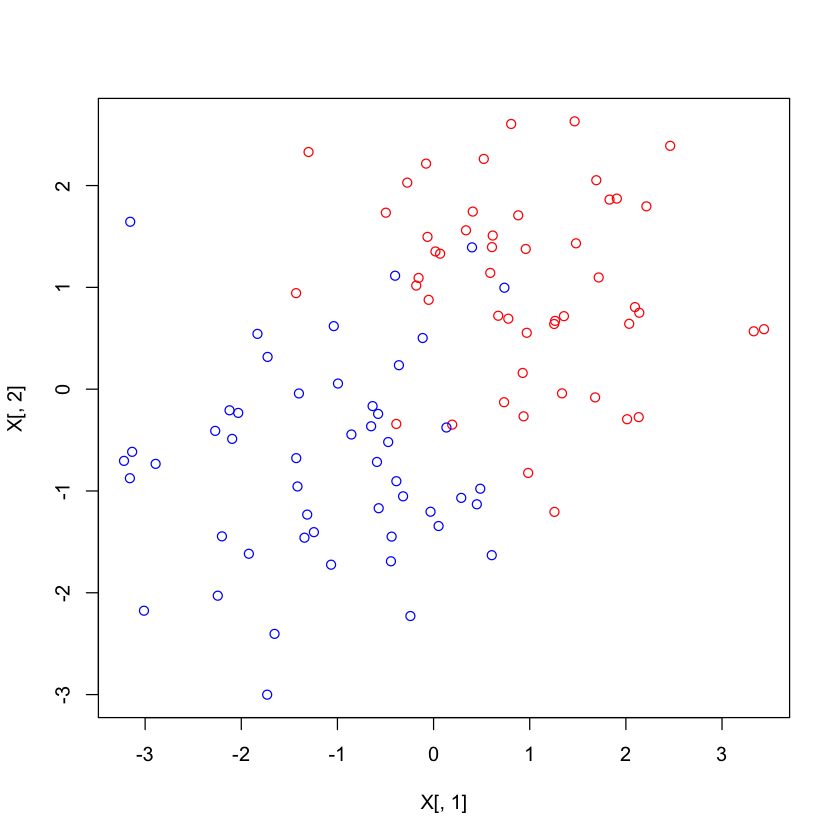

In [17]:
plot(X[,1], X[,2],col=z+3)

In [18]:
traindata <- as.data.frame(cbind(z, X))
colnames(traindata) <- c("z", "x1", "x2")
lm.obj <- lm( z~x1+x2, data=traindata)
zhat <- predict(lm.obj)

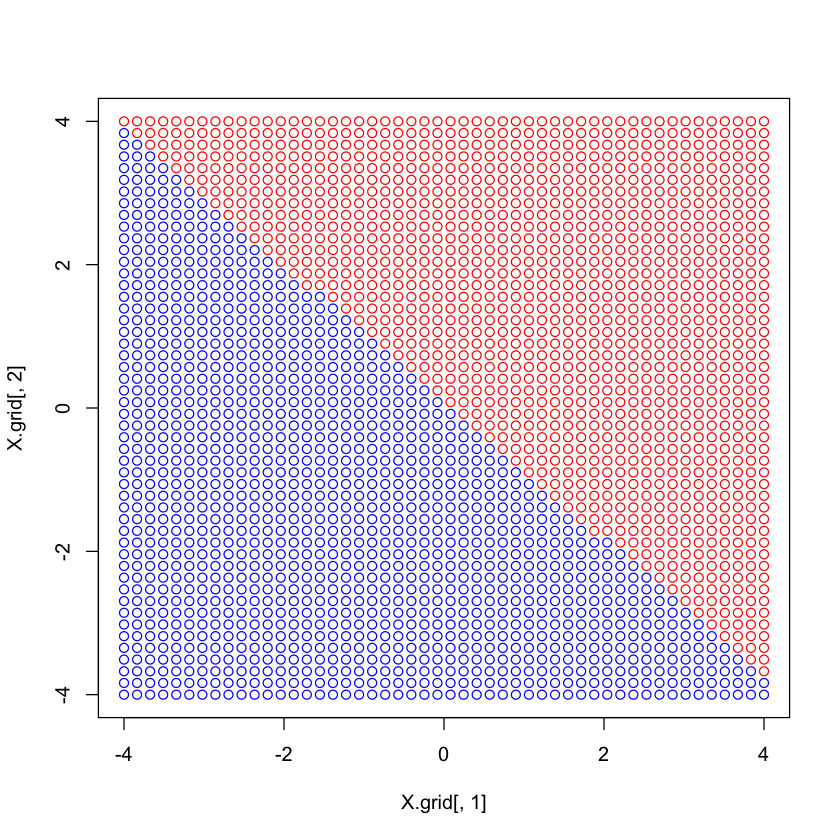

In [19]:
n <- 50
X.grid <- expand.grid(seq(-4, 4, length=n), seq(-4, 4, length=n))
testdata <- as.data.frame (cbind(z, X.grid)) 
colnames(testdata) <- c("z", "x1", "x2")
zhat.grid <- predict(lm.obj, newdata=testdata)
z.gridclass <- 2*(zhat.grid>0)-1
plot(X.grid[,1], X.grid[,2], col=z.gridclass+3)